In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data=pd.read_csv('Fraud_check.csv',encoding='latin1')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df=data.copy()
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
df.insert(6,'tax_class', " ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

<ipython-input-8-5c76132e4e2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
<ipython-input-8-5c76132e4e2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [10]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [11]:
df.drop(['Taxable.Income'], axis=1, inplace=True)
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])


In [13]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [15]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


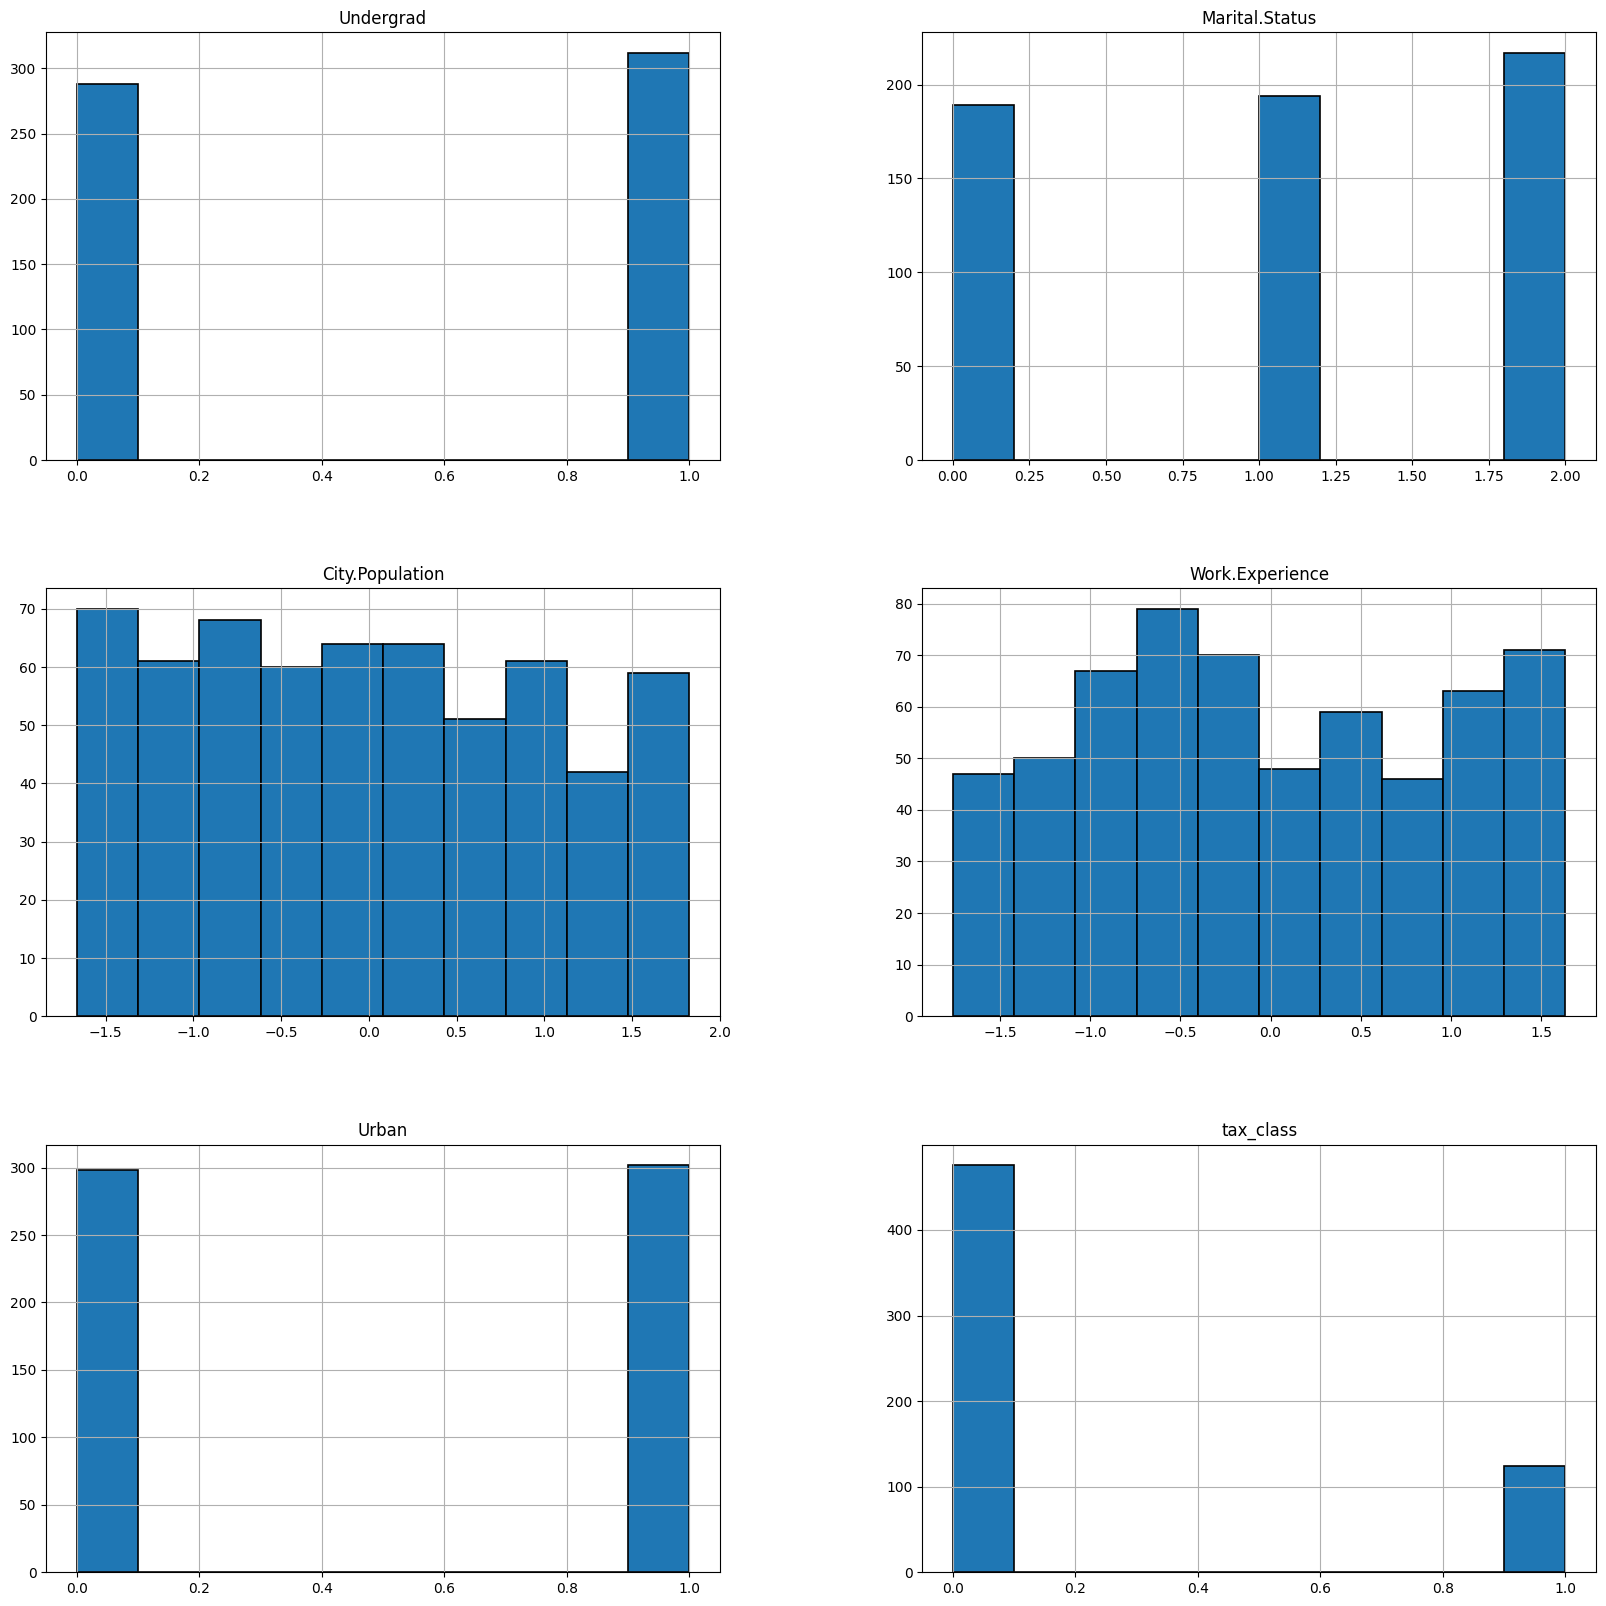

In [16]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

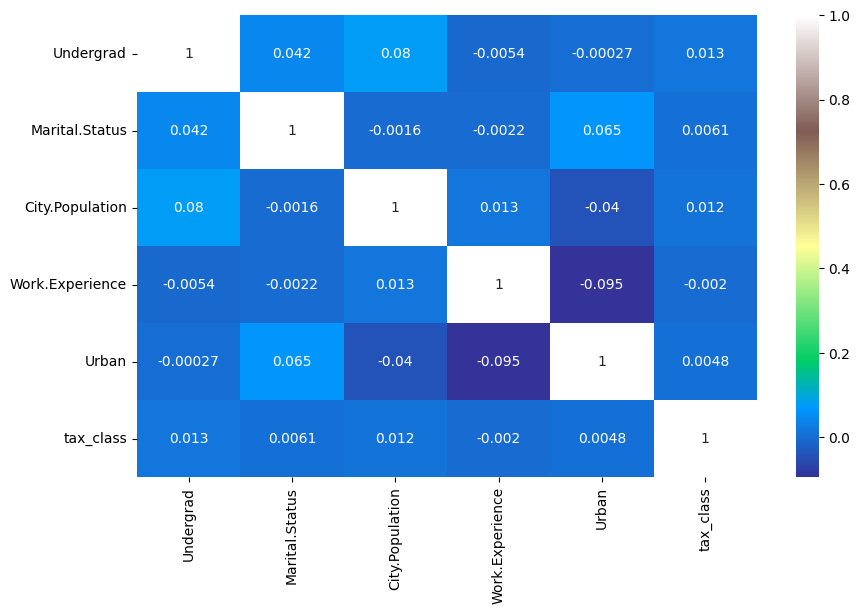

In [17]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [18]:
pdata=df.copy()
pdata.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0


In [19]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']

In [20]:
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

**<h3>Model building using Random forest</h3>**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X= df.iloc[:,1:5]
y= df.iloc[:,5]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=30)

In [23]:
x_train

,Marital.Status,City.Population,Work.Experience,Urban
208,2,0.657611,-1.421466,0
181,0,-1.458212,0.502748,0
447,1,1.161621,-1.195088,1
362,0,-0.666460,0.163181,1
129,2,-0.868895,1.181882,0
...,...,...,...,...
430,1,1.053387,-0.855521,0
145,0,1.780311,-1.534655,1
140,1,-0.308328,-1.308277,1
500,2,1.004500,-0.515953,1


In [24]:
y_train

208    0
181    1
447    0
362    1
129    0
      ..
430    0
145    0
140    1
500    0
421    0
Name: tax_class, Length: 420, dtype: int64

In [25]:
x_test

,Marital.Status,City.Population,Work.Experience,Urban
549,1,-0.696455,-0.515953,1
124,0,0.613884,-0.289575,0
422,0,1.671112,-0.176386,1
579,2,0.328551,-0.968710,1
74,0,1.477089,0.163181,0
...,...,...,...,...
130,2,-0.421963,-0.968710,1
188,0,0.578649,-0.629143,0
171,1,-0.103062,0.955504,0
222,0,1.194588,1.295072,0


In [26]:
y_test

549    0
124    0
422    0
579    0
74     0
      ..
130    0
188    1
171    1
222    0
220    0
Name: tax_class, Length: 180, dtype: int64

In [27]:
print("Shape : ")
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

Shape : 
x_train (420, 4)
y_train (420,)
x_test (180, 4)
y_test (180,)


In [28]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
pred=model.predict(x_test)
print(np.mean(y_test==pred))

0.7444444444444445


**<h3>Using grid search optimisation</h3>**

In [30]:
model=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=19, max_leaf_nodes=19, n_estimators=1000)

In [31]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

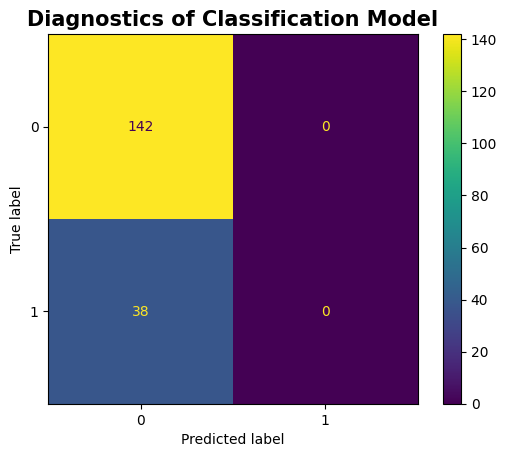

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model.classes_).plot()
plt.title("Diagnostics of Classification Model",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [33]:
"Accuracy score"
acc=accuracy_score(y_test,pred)
print('Accuracy Score is:', acc*100, '%')

Accuracy Score is: 78.88888888888889 %


In [34]:
"Misclassification"
misclass=1-accuracy_score(y_test,pred)
print('Misclassification:', misclass)

Misclassification: 0.21111111111111114


In [35]:
"Classification Report"
classification_report(y_test,pred)
print('Classification Report', classification_report(y_test,pred))

Classification Report               precision    recall  f1-score   support

           0       0.79      1.00      0.88       142
           1       0.00      0.00      0.00        38

    accuracy                           0.79       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.62      0.79      0.70       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**<h3>Bagging</h3>**

In [36]:
model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
model_train=model.fit(x_train,y_train)

In [37]:
pred=model_train.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

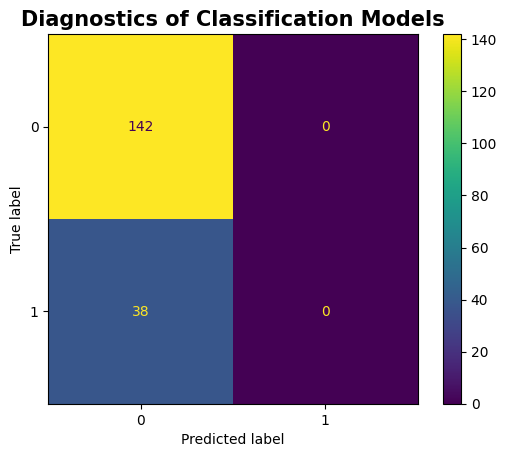

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

result=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Models",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()

In [39]:
acc=accuracy_score(y_test,pred)
print('Accuracy Score is:', acc*100, '%')

Accuracy Score is: 78.88888888888889 %


In [40]:
misclass=1-accuracy_score(y_test,pred)
print('Misclassification:', misclass*100, '%')

Misclassification: 21.111111111111114 %


In [41]:
classification_report(y_test,pred)
print('Classification Report', classification_report(y_test,pred))

Classification Report               precision    recall  f1-score   support

           0       0.79      1.00      0.88       142
           1       0.00      0.00      0.00        38

    accuracy                           0.79       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.62      0.79      0.70       180



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**<h3>Random Forest model with entropy criterion gave us better accuracy.</h3>**

In [42]:
model_train.feature_importances_

array([0.08151395, 0.53493761, 0.33003909, 0.05350935])

In [43]:
impor1=pd.DataFrame({'Feature':list(X.columns), 'Importance':model_train.feature_importances_}).sort_values('Importance', ascending=False)
impor1

,Feature,Importance
1,City.Population,0.534938
2,Work.Experience,0.330039
0,Marital.Status,0.081514
3,Urban,0.053509


<Axes: >

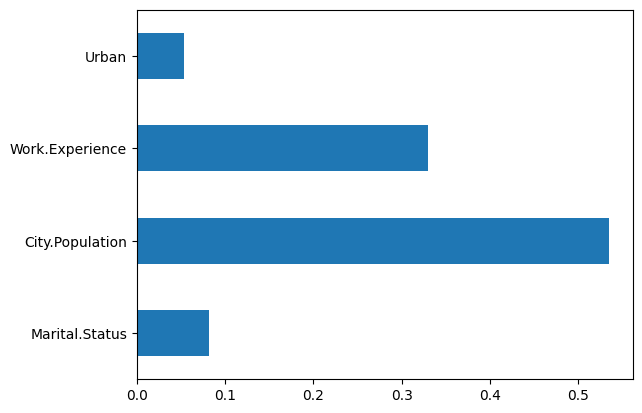

In [44]:
feat_impt=pd.Series(model_train.feature_importances_, index=X.columns)
feat_impt.plot(kind="barh")